In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [63]:
old = pd.read_csv("/Users/ben/tree_stats_old.csv")
new = pd.read_csv("/Users/ben/tree_stats_new.csv")

In [64]:
DS_LIST=['COIL20','dermatology', 'wine', 'isolet', 'image-segmentation']
contains_str=""
for i in DS_LIST:
    contains_str+=f"{i}|"
contains_str = contains_str[:-1]
old = old[old['filename'].str.contains(contains_str)]
new = new[new['filename'].str.contains(contains_str)]

In [65]:
old_fnames = list(old['filename'])
new_fnames = list(new['filename'])
old_count_dict={}
new_count_dict={}
for data in DS_LIST:
    old_count_dict[data]=0
    new_count_dict[data]=0

# new
for fname in old_fnames:
    for key in DS_LIST:
        if key in fname:
            old_count_dict[key]+=1
# old
for fname in old_fnames:
    for key in DS_LIST:
        if key in fname:
            new_count_dict[key]+=1
            
print(old_count_dict)
print(new_count_dict)

{'COIL20': 2287, 'dermatology': 482, 'wine': 210, 'isolet': 2723, 'image-segmentation': 285}
{'COIL20': 2287, 'dermatology': 482, 'wine': 210, 'isolet': 2723, 'image-segmentation': 285}


In [66]:
# let's drop un=n columns
new = new.drop(['filename','algo'], axis=1)
old = old.drop(['filename','algo'], axis=1)

In [73]:
def summary_plots(df, dfname):
    title_dict={
        'exp': '# $\mathcal{O}(2^{n})$ nodes',
        'prod': '# $\mathcal{O}(n^{2})$ nodes',
        'sum': '# $\mathcal{O}(n)$ nodes',
        'const': '# $\mathcal{O}(1)$ nodes',
        'nodes': '# nodes',
        'unique_feats': '# unique featues'
    }
    fig, axs = plt.subplots(2,3, figsize=(10, 10))  # create a 3x2 subplot
    for i, col in enumerate(new.columns):  # loop over the columns
        ax = axs[0 if (i<3) else 1, i%3]  # get the corresponding axis
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.hist(df[col], bins=10)  # create a histogram of the column data
        ax.axvline(np.median(df[col]), color='red', linestyle='dashed', linewidth=2)
        ax.set_title(f"{title_dict[col]}", fontsize=20)  # set the title of the subplot
        ax.tick_params(axis='x', labelsize=20, pad=10, rotation=90)
        ax.tick_params(axis='y', labelsize=20)
    plt.tight_layout()  # adjust the spacing between subplots
    fig.suptitle(f"{dfname} summary statistics", y=1.01, fontsize=20)
    plt.show()  # show the plot

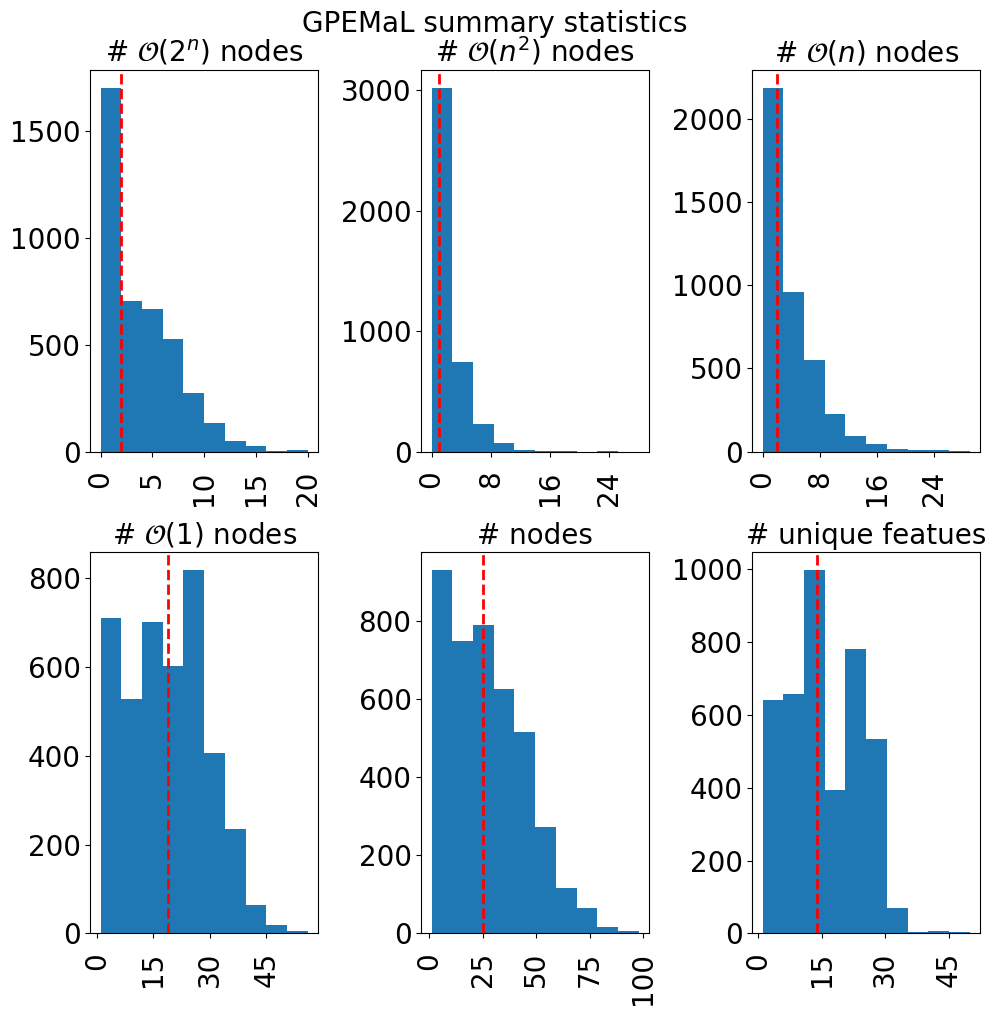

In [74]:
summary_plots(new, "GPEMaL")

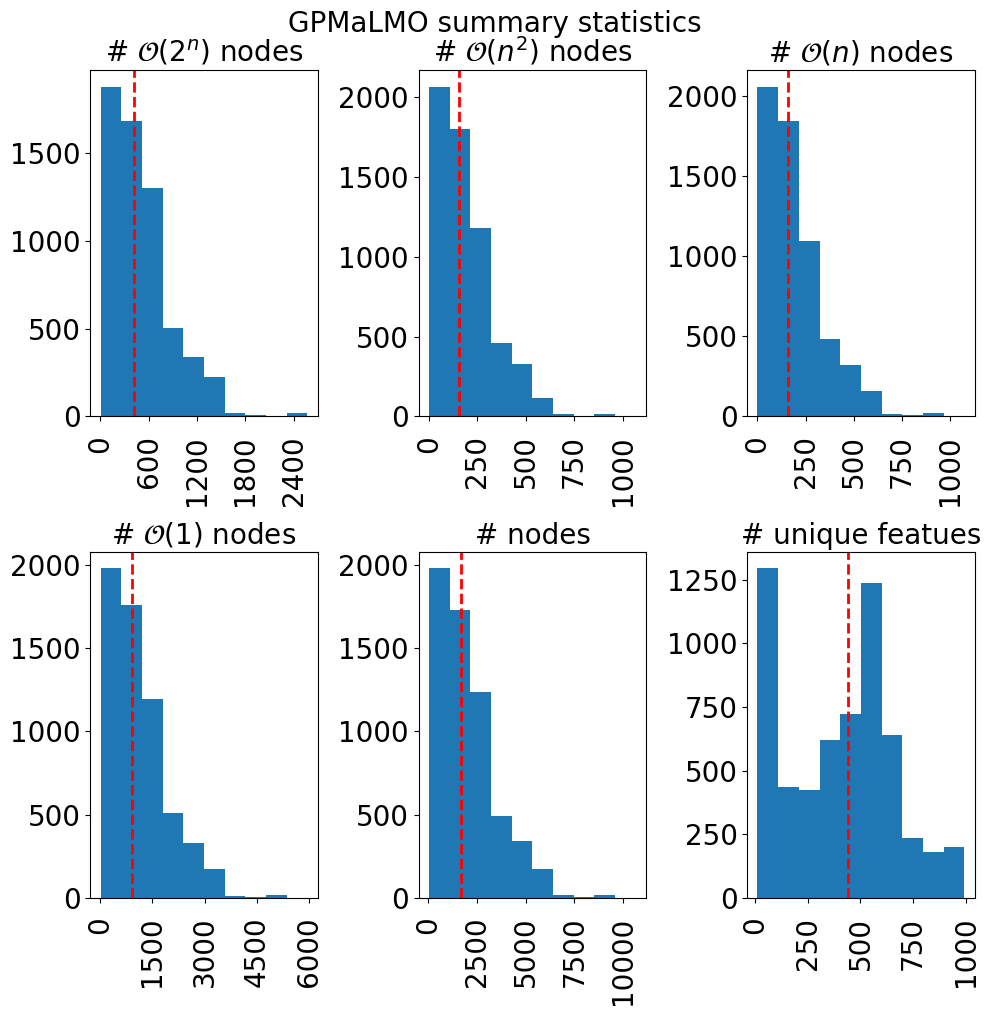

In [75]:
summary_plots(old, "GPMaLMO")